In [1]:
from google.colab import files

uploaded = files.upload()
import pandas as pd

df = pd.read_csv('carematch_requests.csv')

print(df.head())



Saving carematch_requests.csv to carematch_requests.csv
   patient_id  age  gender  zip_code insurance_type  \
0           1   69   Other     21937       Medicare   
1           2   32  Female     13463       Medicare   
2           3   89   Other     35252        Private   
3           4   78    Male     65577       Medicaid   
4           5   38   Other     27733      Uninsured   

                                   condition_summary  urgency_score  \
0  Need pediatric consultation for child’s ADHD e...              4   
1  Ongoing depression and emotional instability, ...              3   
2  Ongoing depression and emotional instability, ...              4   
3  Sudden vision blur and headaches over last two...              5   
4  Ongoing depression and emotional instability, ...              4   

  language_pref  past_provider_rating  mental_health_flag  \
0       English                   3.6                   0   
1        Arabic                   1.3                   0   
2  

In [2]:
print("Missing values per column:")
print(df.isnull().sum())

# 2. Inspect data types
print("\nData types of each column:")
print(df.dtypes)

# 3. Handle missing values:
# For example, fill missing pastproviderrating with the median
if 'past_provider_rating' in df.columns:
    median_rating = df['past_provider_rating'].median()
    df['past_provider_rating'] = df['past_provider_rating'].fillna(median_rating)

# For categorical columns, fill missing values with 'Unknown' or mode
categorical_cols = ['gender', 'insurance_type', 'language_pref', 'preferred_time', 'provider_specialty']
for col in categorical_cols:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

# 4. Convert data types if needed, e.g., ensure 'urgency_score' is integer
df.columns = df.columns.str.strip()  # Remove whitespace
df['urgency_score'] = df['urgency_score'].astype(int)

# 5. Check for and remove duplicate rows if any
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Missing values per column:
patient_id                  0
age                         0
gender                      0
zip_code                    0
insurance_type              0
condition_summary           0
urgency_score               0
language_pref               0
past_provider_rating        0
mental_health_flag          0
chronic_conditions_count    0
preferred_time              0
request_timestamp           0
assigned_provider_id        0
provider_specialty          0
wait_time                   0
match_success               0
dtype: int64

Data types of each column:
patient_id                    int64
age                           int64
gender                       object
zip_code                      int64
insurance_type               object
condition_summary            object
urgency_score                 int64
language_pref                object
past_provider_rating        float64
mental_health_flag            int64
chronic_conditions_count      int64
preferred_time            

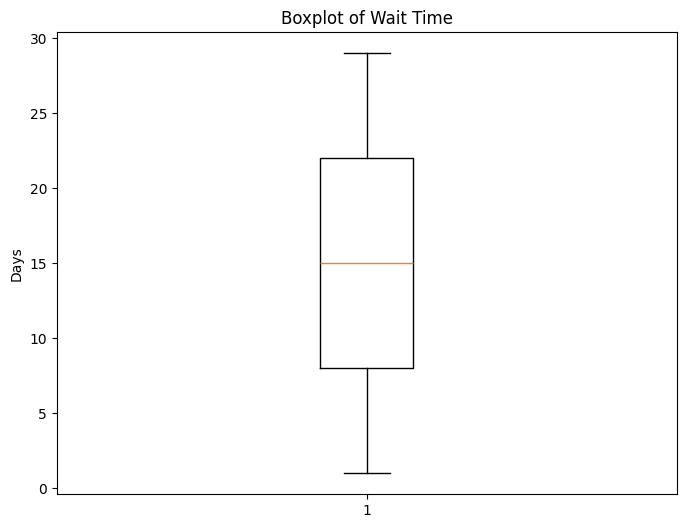

Lower bound: -13.0
Upper bound: 43.0
Rows before removing outliers: 5000
Rows after removing outliers: 5000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot boxplot to show outliers for 'waittime'
plt.figure(figsize=(8, 6))
plt.boxplot(df['wait_time'].dropna())
plt.title('Boxplot of Wait Time')
plt.ylabel('Days')
plt.show()

# Calculate IQR for 'waittime'
Q1 = df['wait_time'].quantile(0.25)
Q3 = df['wait_time'].quantile(0.75)
IQR = Q3 - Q1

print(f"Lower bound: {Q1 - 1.5 * IQR}")
print(f"Upper bound: {Q3 + 1.5 * IQR}")

# Filter to remove outliers based on IQR
df_clean = df[(df['wait_time'] >= (Q1 - 1.5 * IQR)) & (df['wait_time'] <= (Q3 + 1.5 * IQR))]

print(f"Rows before removing outliers: {len(df)}")
print(f"Rows after removing outliers: {len(df_clean)}")

Summary statistics for numerical columns:
        patient_id          age      zip_code  urgency_score  \
count  5000.000000  5000.000000   5000.000000    5000.000000   
mean   2500.500000    53.299000  49641.064200       2.973600   
std    1443.520003    20.646851  28692.572608       1.413543   
min       1.000000    18.000000    516.000000       1.000000   
25%    1250.750000    36.000000  25077.750000       2.000000   
50%    2500.500000    53.000000  49550.500000       3.000000   
75%    3750.250000    71.000000  74663.750000       4.000000   
max    5000.000000    89.000000  99876.000000       5.000000   

       past_provider_rating  mental_health_flag  chronic_conditions_count  \
count           5000.000000         5000.000000               5000.000000   
mean               3.017720            0.140000                  1.487600   
std                1.145644            0.347022                  1.224805   
min                1.000000            0.000000                  0.000000

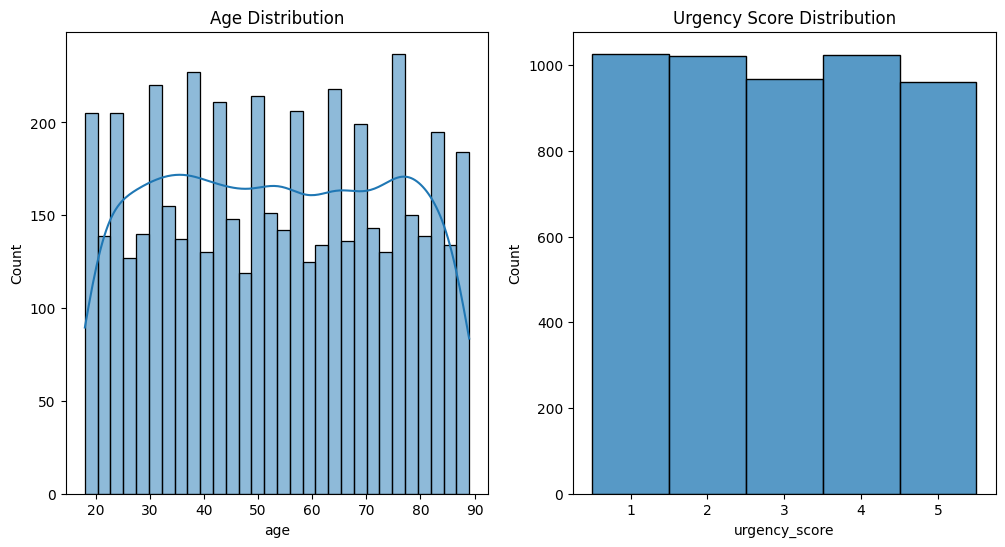

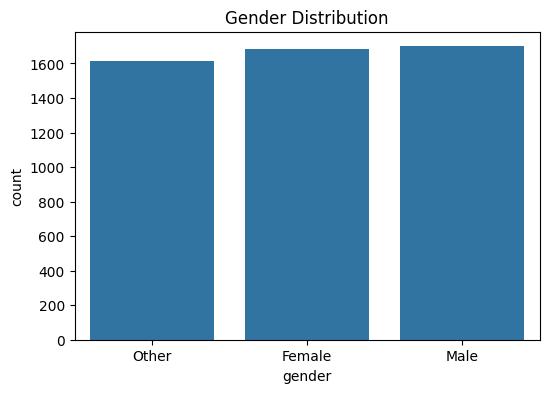

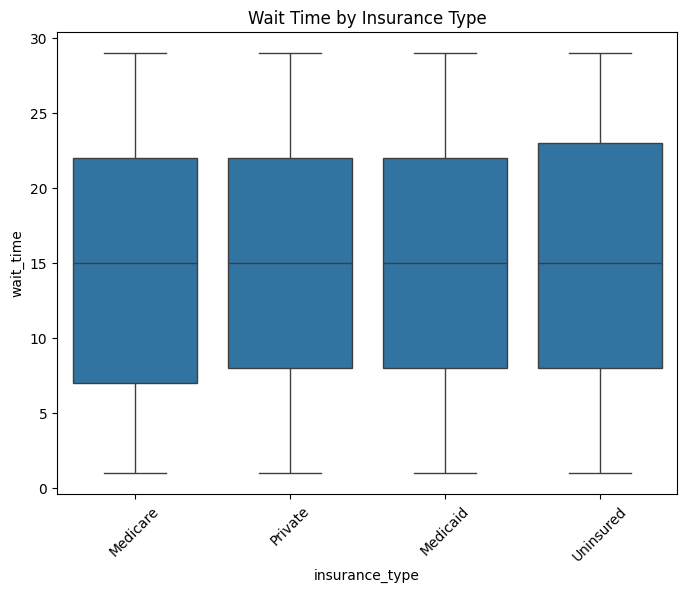

/tmp/ipython-input-2316206161.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='urgency_score', y='match_success', data=df, ci=None)


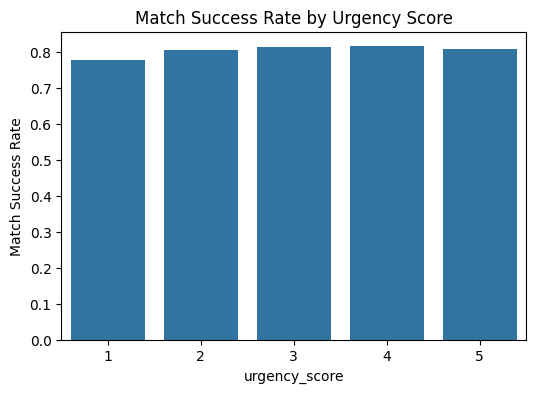

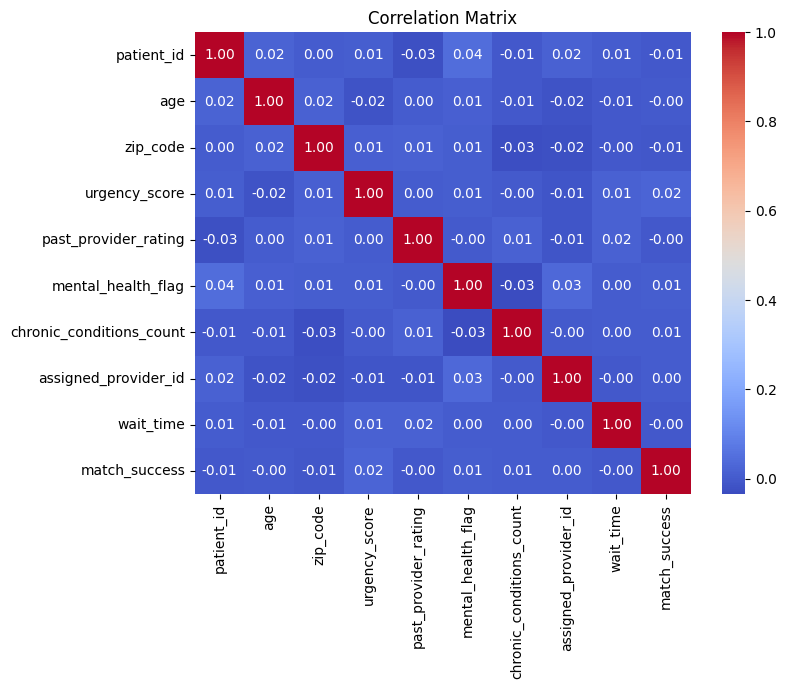

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df.columns = df.columns.str.strip()  # Remove whitespace

# Basic Summary Stats
print("Summary statistics for numerical columns:")
print(df.describe())

print("\nValue counts for categorical columns:")
for col in ['gender', 'insurance_type', 'language_pref', 'provider_specialty']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())

# Distribution plots for key quantitative variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['urgency_score'], bins=5, discrete=True)
plt.title('Urgency Score Distribution')
plt.show()

# Bar plot for categorical variable: gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

# Boxplot of waittime by insurance type
plt.figure(figsize=(8, 6))
sns.boxplot(x='insurance_type', y='wait_time', data=df)
plt.title('Wait Time by Insurance Type')
plt.xticks(rotation=45)
plt.show()

# Relationship of match success with urgency score (barplot)
plt.figure(figsize=(6,4))
sns.barplot(x='urgency_score', y='match_success', data=df, ci=None)
plt.ylabel('Match Success Rate')
plt.title('Match Success Rate by Urgency Score')
plt.show()

# Heatmap of correlation for numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

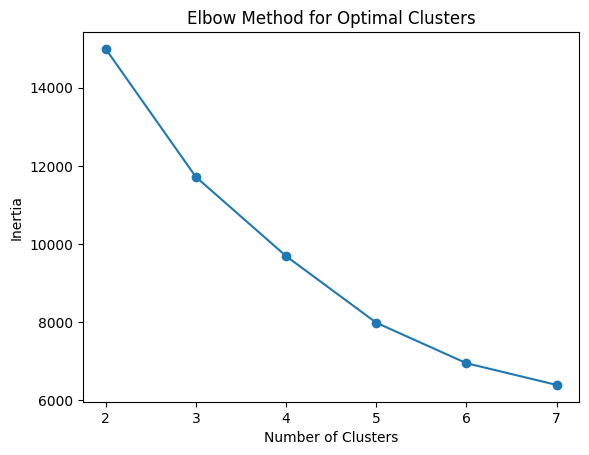

Patient segment profiles:
                      age  urgency_score  chronic_conditions_count  \
PatientSegment                                                       
0               71.392627       2.932124                  1.038034   
1               35.342075       3.001140                  1.027366   
2               53.871942       3.001439                  1.345324   
3               53.508314       2.977435                  3.476247   

                mental_health_flag  
PatientSegment                      
0                         0.000000  
1                         0.000000  
2                         1.000000  
3                         0.005938  


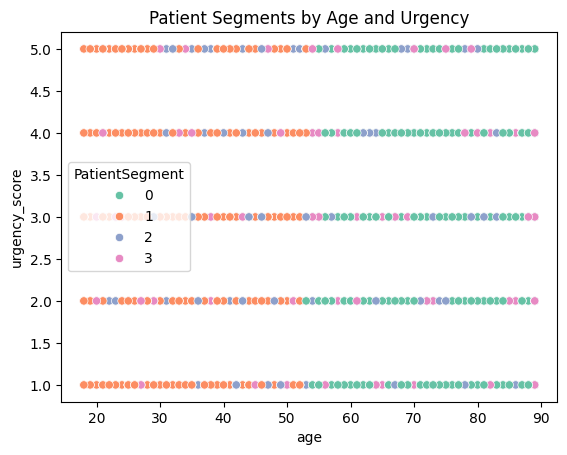

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Select and clean features for segmentation
features = ['age', 'urgency_score', 'chronic_conditions_count', 'mental_health_flag']
X = df[features].dropna()  # Remove missing values from selected columns

# Step 3: Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine optimal number of clusters w/ elbow method
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Step 5: Fit KMeans (choose optimal clusters, e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
X['PatientSegment'] = clusters

# Step 6: Merge segment labels back to main DataFrame
df['PatientSegment'] = pd.Series(clusters, index=X.index)

# Step 7: Summarize segment profiles
segment_summary = df.groupby('PatientSegment')[features].mean()
print("Patient segment profiles:")
print(segment_summary)

# Step 8: Visualize segments by age and urgency
sns.scatterplot(data=df, x='age', y='urgency_score', hue='PatientSegment', palette='Set2')
plt.title('Patient Segments by Age and Urgency')
plt.show()

                age gender      zip_code insurance_type language_pref
count   5000.000000   5000   5000.000000           5000          5000
unique          NaN      3           NaN              4             5
top             NaN   Male           NaN      Uninsured         Other
freq            NaN   1699           NaN           1306          1072
mean      53.299000    NaN  49641.064200            NaN           NaN
std       20.646851    NaN  28692.572608            NaN           NaN
min       18.000000    NaN    516.000000            NaN           NaN
25%       36.000000    NaN  25077.750000            NaN           NaN
50%       53.000000    NaN  49550.500000            NaN           NaN
75%       71.000000    NaN  74663.750000            NaN           NaN
max       89.000000    NaN  99876.000000            NaN           NaN


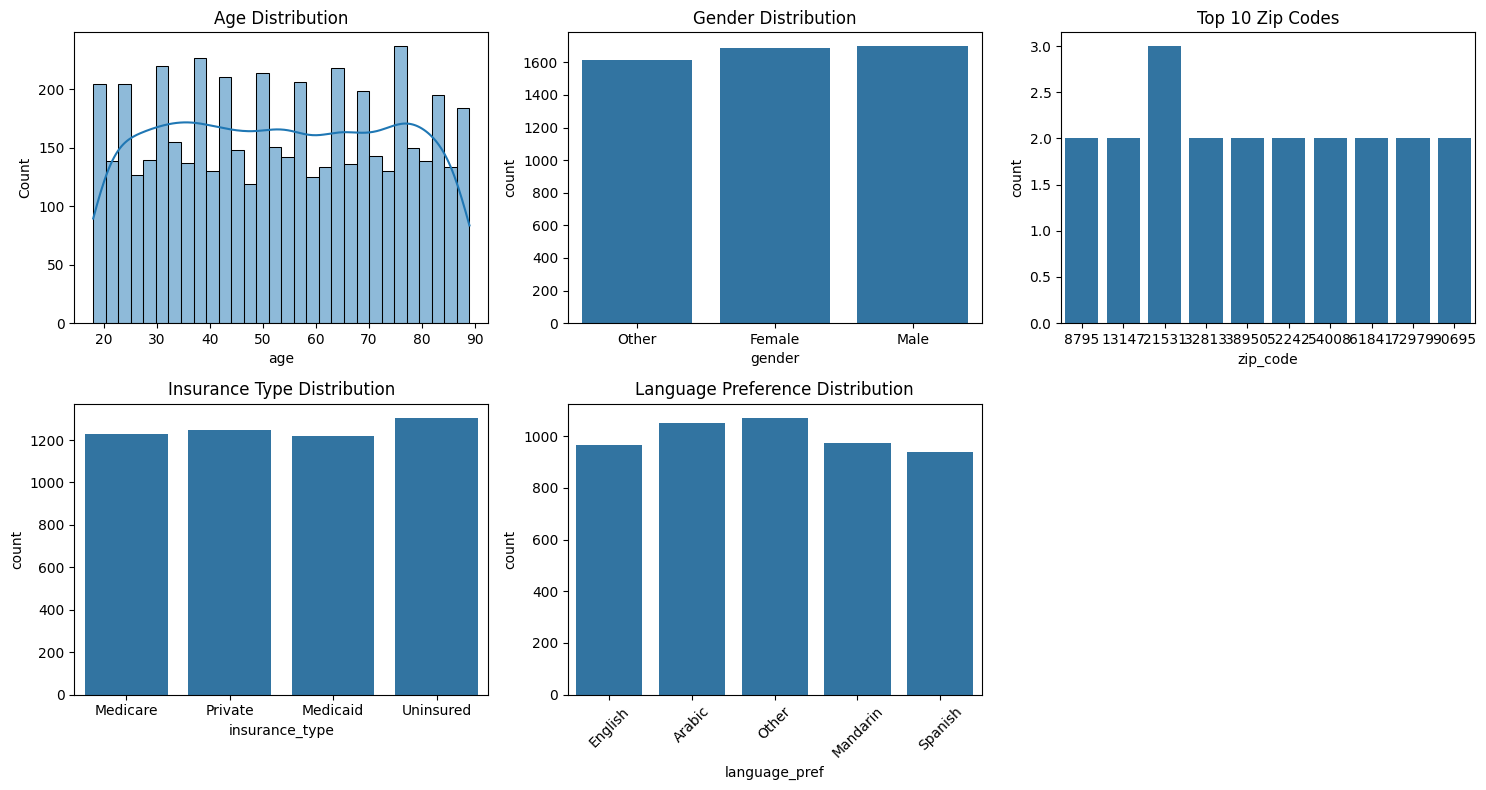

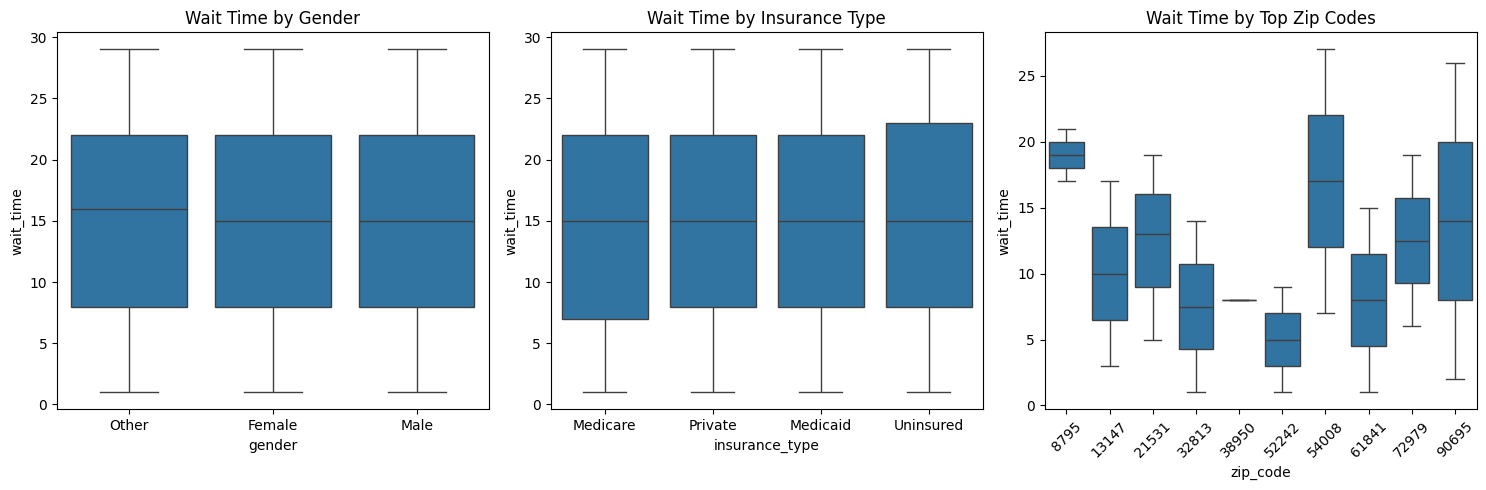


Match Success Rate by gender:
gender
Female    0.805935
Male      0.804591
Other     0.800743
Name: match_success, dtype: float64



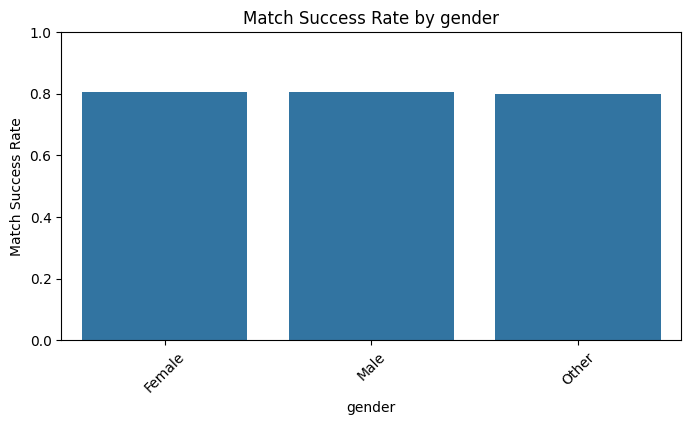


Match Success Rate by insurance_type:
insurance_type
Uninsured    0.816998
Private      0.809142
Medicare     0.799837
Medicaid     0.788177
Name: match_success, dtype: float64



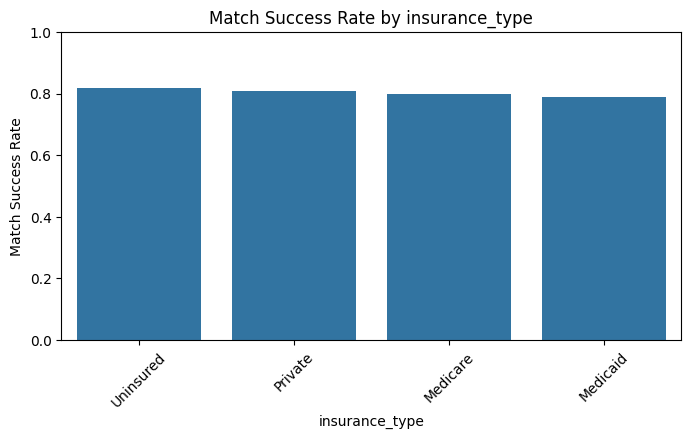


Match Success Rate by language_pref:
language_pref
Mandarin    0.812757
Arabic      0.805133
Other       0.803172
English     0.798964
Spanish     0.798722
Name: match_success, dtype: float64



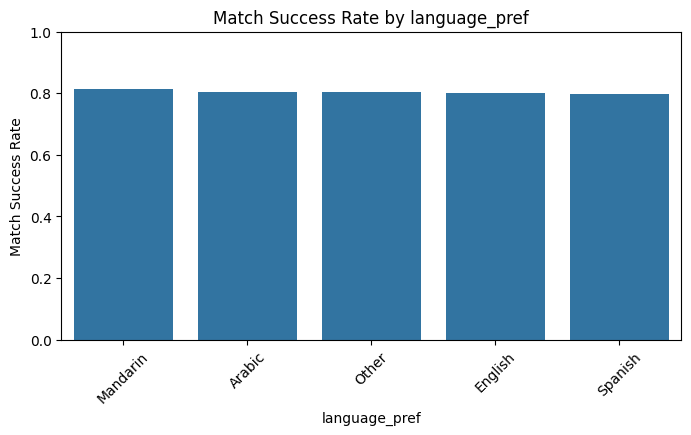

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Summary of demographics
print(df[['age', 'gender', 'zip_code', 'insurance_type', 'language_pref']].describe(include='all'))

# Plot distributions for demographics
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2,3,2)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2,3,3)
top_zips = df['zip_code'].value_counts().nlargest(10).index
sns.countplot(x='zip_code', data=df[df['zip_code'].isin(top_zips)])
plt.title('Top 10 Zip Codes')

plt.subplot(2,3,4)
sns.countplot(x='insurance_type', data=df)
plt.title('Insurance Type Distribution')

plt.subplot(2,3,5)
sns.countplot(x='language_pref', data=df)
plt.title('Language Preference Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wait times by demographics
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='gender', y='wait_time', data=df)
plt.title('Wait Time by Gender')

plt.subplot(1,3,2)
sns.boxplot(x='insurance_type', y='wait_time', data=df)
plt.title('Wait Time by Insurance Type')

plt.subplot(1,3,3)
sns.boxplot(x='zip_code', y='wait_time', data=df[df['zip_code'].isin(top_zips)])
plt.title('Wait Time by Top Zip Codes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Match success by demographics
for col in ['gender', 'insurance_type', 'language_pref']:
    rates = df.groupby(col)['match_success'].mean().sort_values(ascending=False)
    print(f"\nMatch Success Rate by {col}:\n{rates}\n")
    plt.figure(figsize=(8,4))
    sns.barplot(x=rates.index, y=rates.values)
    plt.title(f"Match Success Rate by {col}")
    plt.ylabel('Match Success Rate')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

In [7]:
pip install -U pandas numpy gradio transformers datasets sentencepiece torch scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.6/503.6 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Succe

In [1]:
import os, re, json, textwrap, uuid
import pandas as pd
import numpy as np
import gradio as gr

import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# -------------------------
# CONFIG
# -------------------------
SEED = 42
np.random.seed(SEED); torch.manual_seed(SEED)

# If you fine-tuned already, set MODEL_DIR to that folder; else keep base:
MODEL_DIR = os.environ.get("TRIAGE_MODEL_DIR", "google/flan-t5-base")

MAX_INPUT_TOKENS  = 768
MAX_OUTPUT_TOKENS = 160

# Optional: point to your files (can also upload in the UI)
DEFAULT_CSV_PATH = "data.csv"              # your form data (rows = patients)
DEFAULT_DICT_PATH = "data_dictionary.csv"  # optional, for column hints

# -------------------------
# LOAD MODEL
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_DIR).to(device)

# -------------------------
# HEURISTICS: column detection (works even if names differ a bit)
# -------------------------
TEXT_KEYS = ["condition", "summary", "chief complaint", "symptom", "present illness", "note", "reason"]
AGE_KEYS  = ["age", "dob"]
LANG_KEYS = ["language", "preferred language"]
ZIP_KEYS  = ["zip", "zipcode", "postal"]

def _norm(s): return re.sub(r"[^a-z0-9]+"," ", str(s).lower()).strip()

def guess_col(cols, keys):
    cols_norm = {c:_norm(c) for c in cols}
    best, score = None, -1
    for c, cn in cols_norm.items():
        sc = 0
        for k in keys:
            if k in cn: sc += 1
        if sc > score:
            best, score = c, sc
    return best

# -------------------------
# PROMPT TEMPLATES
# -------------------------
GUIDELINES = """\
You are a clinical intake assistant for CareMatch. Produce TWO things:
1) A concise clinical SUMMARY (2–4 sentences) of the patient's condition.
2) An OPERATIONS-ORIENTED TRIAGE INSTRUCTION with: Department, Priority (emergent/urgent/standard), and Timeframe (e.g., immediate/24h/72h).

Rules:
- No diagnosis; no medication advice.
- Keep it professional, clear, and action-focused.
- If red flags for time-sensitive emergencies (e.g., chest pain with diaphoresis, stroke signs, anaphylaxis, severe respiratory distress, suicidal intent), mark Priority=emergent and recommend immediate escalation.
"""

def build_prompt(row_or_dict):
    # Accept dict with keys like condition_summary, age, language, zip
    cs = str(row_or_dict.get("condition_summary","")).strip()
    age = str(row_or_dict.get("age","")).strip()
    lang = str(row_or_dict.get("language","")).strip()
    zc = str(row_or_dict.get("zip","")).strip()

    ctx_bits = []
    if age and age.lower()!="nan": ctx_bits.append(f"Age: {age}")
    if lang and lang.lower()!="nan": ctx_bits.append(f"Language: {lang}")
    if zc and zc.lower()!="nan": ctx_bits.append(f"ZIP: {zc}")

    context = " | ".join(ctx_bits)

    return textwrap.dedent(f"""
    {GUIDELINES}

    Patient report:
    {cs}

    Context: {context if context else "N/A"}

    Return JSON with this schema:
    {{
      "summary": "<2-4 sentences>",
      "triage_instruction": {{
         "department": "<where to route>",
         "priority": "<emergent|urgent|standard>",
         "timeframe": "<e.g., immediate|within 24h|within 72h>",
         "notes": "<very short rationale>"
      }}
    }}
    """).strip()

# -------------------------
# RED-FLAG RULES (safety overlay)
# -------------------------
RED_FLAG_PATTERNS = [
    r"chest pain.*(sweat|diaphores|shortness of breath|sob|radiat)",
    r"(stroke|facial droop|slurred speech|one[- ]sided weakness)",
    r"(anaphylaxis|throat closing|severe allergy|tongue swelling)",
    r"(suicidal|suicide|kill myself|self[- ]harm|harming myself)",
    r"(severe|worsening) (shortness of breath|breathlessness|dyspnea)",
    r"(postpartum).*(bleed|hemorrhage|fever|foul smell)",
]
RED_FLAG_DEPT = "Emergency / Rapid Response"

def apply_red_flag_overlay(text):
    if not text: return None
    low = text.lower()
    for pat in RED_FLAG_PATTERNS:
        if re.search(pat, low):
            return {
                "summary_addendum": "Red flag pattern detected by safety rules.",
                "triage_instruction": {
                    "department": RED_FLAG_DEPT,
                    "priority": "emergent",
                    "timeframe": "immediate",
                    "notes": "Escalate to on-site emergency team or send to ED."
                }
            }
    return None

# -------------------------
# MODEL INFERENCE
# -------------------------
def llm_json(prompt):
    enc = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=MAX_INPUT_TOKENS).to(device)
    out = model.generate(**enc, max_new_tokens=MAX_OUTPUT_TOKENS, num_beams=4)
    txt = tokenizer.decode(out[0], skip_special_tokens=True).strip()
    # attempt to find JSON
    m = re.search(r"\{.*\}\s*$", txt, flags=re.S)
    if m:
        txt = m.group(0)
    # lenient JSON parse
    try:
        return json.loads(txt)
    except Exception:
        # fallback: wrap as dict
        return {"summary": txt, "triage_instruction": {"department":"", "priority":"", "timeframe":"", "notes":""}}

def analyze_case(case_dict):
    # Safety overlay first
    overlay = apply_red_flag_overlay(case_dict.get("condition_summary",""))
    prompt = build_prompt(case_dict)
    result = llm_json(prompt)

    # Merge overlay
    if overlay:
        if result.get("summary"):
            result["summary"] = result["summary"].rstrip(".") + " " + overlay["summary_addendum"]
        else:
            result["summary"] = overlay["summary_addendum"]
        result["triage_instruction"] = overlay["triage_instruction"]

    # minimal post-cleaning
    ti = result.get("triage_instruction", {})
    ti["department"] = (ti.get("department") or "").strip() or "Intake Nurse / Routing Desk"
    ti["priority"]   = (ti.get("priority") or "").strip().lower() or "standard"
    ti["timeframe"]  = (ti.get("timeframe") or "").strip() or ("immediate" if ti["priority"]=="emergent" else "within 72h")
    ti["notes"]      = (ti.get("notes") or "").strip()

    result["triage_instruction"] = ti
    return result

# -------------------------
# CSV HELPERS
# -------------------------
def load_csv(file_obj_or_path):
    df = pd.read_csv(file_obj_or_path)
    cols = df.columns.tolist()
    text_col = guess_col(cols, TEXT_KEYS)
    age_col  = guess_col(cols, AGE_KEYS)
    lang_col = guess_col(cols, LANG_KEYS)
    zip_col  = guess_col(cols, ZIP_KEYS)

    # map into unified keys the app expects
    mapped = pd.DataFrame()
    mapped["condition_summary"] = df[text_col] if text_col else ""
    if age_col:  mapped["age"] = df[age_col]
    if lang_col: mapped["language"] = df[lang_col]
    if zip_col:  mapped["zip"] = df[zip_col]
    # keep original index for back-reference
    mapped["_row_id"] = np.arange(len(mapped))
    return df, mapped, {"text": text_col, "age": age_col, "lang": lang_col, "zip": zip_col}

def batch_analyze(mapped_df):
    outs = []
    for _, row in mapped_df.iterrows():
        res = analyze_case(row.to_dict())
        outs.append(res)
    # flatten
    flat = []
    for i, r in enumerate(outs):
        ti = r.get("triage_instruction", {})
        flat.append({
            "_row_id": mapped_df.iloc[i]["_row_id"],
            "summary": r.get("summary",""),
            "department": ti.get("department",""),
            "priority": ti.get("priority",""),
            "timeframe": ti.get("timeframe",""),
            "notes": ti.get("notes",""),
        })
    return pd.DataFrame(flat)

# -------------------------
# GRADIO CHAT UI
# -------------------------
with gr.Blocks(title="CareMatch Triage Chatbot", theme="default") as demo:
    gr.Markdown("## CareMatch Triage Assistant\nUpload your patient CSV, then chat about cases or paste a new report.\n\n> **Note**: For operational routing only. Not medical advice.")
    state_raw_df = gr.State(None)      # original DF
    state_mapped = gr.State(None)      # normalized DF
    state_cols   = gr.State(None)      # detected col names
    state_cases  = gr.State({})        # id -> dict for quick lookup

    with gr.Row():
        csv_in = gr.File(label="Upload patient CSV", file_types=[".csv"])
        load_btn = gr.Button("Load CSV")

    load_info = gr.Markdown()

    with gr.Row():
        patient_id = gr.Number(label="Row ID (from CSV)", precision=0)
        preset_btn = gr.Button("Load case by Row ID")

    with gr.Row():
        cond_in = gr.Textbox(label="Condition Summary (paste or auto-filled)", lines=6, placeholder="E.g., Left-sided chest pain with exertion...")
    with gr.Row():
        age_in = gr.Textbox(label="Age")
        lang_in = gr.Textbox(label="Language")
        zip_in = gr.Textbox(label="ZIP")

    ask = gr.Button("Analyze")
    out_json = gr.JSON(label="Assistant Output (JSON)")

    with gr.Row():
        batch_btn = gr.Button("Batch analyze all rows")
        dl = gr.File(label="Download CSV with outputs")

    # --- callbacks ---
    def on_load(file):
        if file is None:
            return (gr.update(value="No file selected."), None, None, None, {})
        raw, mapped, cols = load_csv(file.name)
        cases = {}
        for _, r in mapped.iterrows():
            cases[int(r["_row_id"])] = {
                "condition_summary": str(r.get("condition_summary","")),
                "age": str(r.get("age","")),
                "language": str(r.get("language","")),
                "zip": str(r.get("zip","")),
            }
        msg = (
            f"Loaded {len(mapped)} rows. "
            f"Detected columns → text: `{cols['text']}`, age: `{cols['age']}`, lang: `{cols['lang']}`, zip: `{cols['zip']}`."
        )
        return (gr.update(value=msg), raw, mapped, cols, cases)

    load_btn.click(fn=on_load, inputs=[csv_in], outputs=[load_info, state_raw_df, state_mapped, state_cols, state_cases])

    def load_case_by_id(row_id, cases):
        if cases is None or row_id is None:
            return gr.update(), gr.update(), gr.update(), gr.update()
        row_id = int(row_id)
        case = cases.get(row_id)
        if not case:
            return gr.update(value=""), gr.update(value=""), gr.update(value=""), gr.update(value="")
        return (gr.update(value=case["condition_summary"]),
                gr.update(value=case.get("age","")),
                gr.update(value=case.get("language","")),
                gr.update(value=case.get("zip","")))

    preset_btn.click(fn=load_case_by_id, inputs=[patient_id, state_cases], outputs=[cond_in, age_in, lang_in, zip_in])

    def analyze_ui(cond, age, lang, zc):
        case = {"condition_summary": cond or "", "age": age or "", "language": lang or "", "zip": zc or ""}
        result = analyze_case(case)
        return result

    ask.click(fn=analyze_ui, inputs=[cond_in, age_in, lang_in, zip_in], outputs=[out_json])

    def batch_ui(mapped_df):
        if mapped_df is None:
            return None
        out = batch_analyze(mapped_df)
        # join back original row order for clarity
        out = out.sort_values("_row_id")
        out_path = f"triage_outputs_{uuid.uuid4().hex[:8]}.csv"
        out.to_csv(out_path, index=False)
        return out_path

    batch_btn.click(fn=batch_ui, inputs=[state_mapped], outputs=[dl])

# entry
if __name__ == "__main__":
    demo.launch()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6ef989c70d5734075c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
